In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt 
import seaborn as sns
from ERANataf import ERANataf
from ERADist import ERADist

# Bayesian Updating 
    Conjugate prior case
    L(xi,theta) : Xi ~ Normal(theta,sigma_X = 1)
    L((x1,x2,...xN),theta) = L(x1,theta)*L(x2,theta)*...*L(xN,theta)
    Prior ~ normal (mu_theta_prior. sigma_theta_prior)
    Posterior: ~ normal (mu_theta_posterior, sigma_theta_posterior)
    
    # Analytical solution:
    mu_theta_posterior = (mu_theta_prior/sigma_theta_prior^2+N*x_bar/sigma_X^2)/(1/sigma_theta_prior^2+N/sigma_X^2)
    sigma_theta_posterior = (1/sigma_theta_prior^2+N/sigma_X^2)^(-1/2)
    # Numerical
    posterior_PDF is proportional to the (Prior_PDF*Likelihood)
    first calculate target_dist = Prior_PDF*Likelihood
    then either do the numerical integration
    or do the sample-based approach
        # Cross Entropy Bayesian Updating
        1. Original scale self version/ function call
        2. Log scale self version/ function call
        
    

In [3]:
# This is an example where prior p(mu) ~ N(0,1),
mu_theta_prior, sigma_theta_prior = -5, 1
prior = lambda theta: sp.stats.norm.pdf(theta,loc = mu_theta_prior, scale = sigma_theta_prior)
log_prior = lambda theta: sp.stats.norm.logpdf(theta,loc=mu_theta_prior,scale = sigma_theta_prior)
# Likelihood functions p(D|mu) ~ normal
data = np.random.randn(10)
np.mean(data)#data.size

0.39038036789285785

In [4]:
# Likelihood function
def Likelihood(theta):
    total_likelihood = 1
    sigma_X  = 1
    for i in range(data.size):
        total_likelihood = total_likelihood*sp.stats.norm.pdf(data[i],loc = theta, scale = sigma_X)
    return total_likelihood
def log_Likelihood(theta):
    total_likelihood = 0
    sigma_X  = 1
    for i in range(data.size):
        total_likelihood = total_likelihood+sp.stats.norm.logpdf(data[i],loc = theta, scale = sigma_X)
    return total_likelihood
# Posterior distribution
def target_dist(theta):
    return prior(theta)*Likelihood(theta)

def log_target_dist(theta):
    return log_prior(theta)+log_Likelihood(theta)

def posterior_analytical(mu_theta_prior,sigma_theta_prior,data):
    n = data.size
    x_bar = np.mean(data)
    sigma_X = 1
    mu_theta_posterior = (mu_theta_prior/sigma_theta_prior**2+n*x_bar/sigma_X**2)/(1/sigma_theta_prior**2+n/sigma_X**2)
    sigma_theta_posterior = (1/sigma_theta_prior**2+n/sigma_X**2)**(-1/2)
    return sp.stats.norm.pdf(theta,loc = mu_theta_posterior, scale = sigma_theta_posterior)

In [5]:
constant = sp.integrate.quad(target_dist,-np.inf,np.inf)
constant

(1.137341001451469e-13, 1.6177220889355334e-14)

In [6]:
theta = np.arange(-20,20)
posterior_analytical(mu_theta_prior,sigma_theta_prior,data)

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 2.04974369e-284, 9.92293632e-235, 8.02308789e-190,
       1.08343683e-149, 2.44357874e-114, 9.20470302e-084, 5.79100477e-058,
       6.08497452e-037, 1.06788455e-020, 3.13004472e-009, 1.53227770e-002,
       1.25280973e+000, 1.71077720e-003, 3.90177741e-011, 1.48625122e-023,
       9.45545990e-041, 1.00469396e-062, 1.78297651e-089, 5.28467339e-121,
       2.61608217e-157, 2.16294417e-198, 2.98675733e-244, 6.88835094e-295,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000])

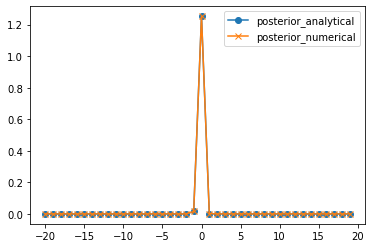

In [7]:
theta = np.arange(-20,20)
plt.plot(theta,posterior_analytical(mu_theta_prior,sigma_theta_prior,data),'-o',label='posterior_analytical')
plt.plot(theta,target_dist(theta)/constant[0],'-x',label='posterior_numerical')
plt.legend()

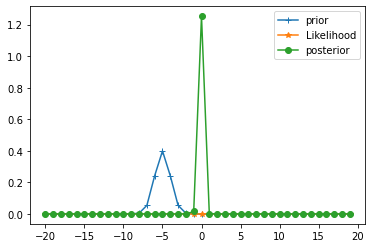

In [8]:
theta = np.arange(-20,20)
plt.plot(theta,prior(theta),'-+',label='prior')
plt.plot(theta,Likelihood(theta),'-*',label='Likelihood')
plt.plot(theta,target_dist(theta)/constant[0],'-o',label='posterior')
plt.legend()

## Cross Entropy Method for Bayesian Updating


CE-based IS stage: 


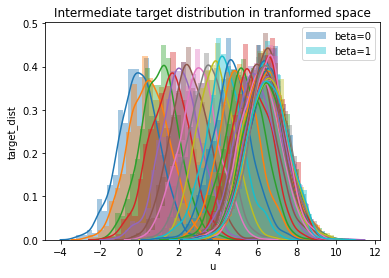

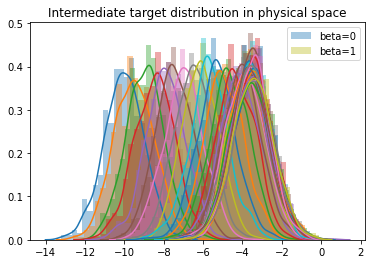

In [32]:
## Self version
# Parameter definition
# Target distribution
#  Parameter definition
# This is an example where prior p(mu) ~ N(0,1),
mu_theta_prior, sigma_theta_prior = -10, 1
prior = lambda theta: sp.stats.norm.pdf(theta,loc = mu_theta_prior, scale = sigma_theta_prior)
log_prior = lambda theta: sp.stats.norm.logpdf(theta,loc=mu_theta_prior,scale = sigma_theta_prior)
theta_prior = ERADist("Normal","MOM",[mu_theta_prior, sigma_theta_prior])
# Likelihood functions p(D|mu) ~ normal
data = np.random.randn(10)
# Likelihood function
def Likelihood(theta):
    total_likelihood = 1
    sigma_X  = 1
    for i in range(data.size):
        total_likelihood = total_likelihood*sp.stats.norm.pdf(data[i],loc = theta, scale = sigma_X)
    return total_likelihood
def log_Likelihood(theta):
    total_likelihood = 0
    sigma_X  = 1
    for i in range(data.size):
        total_likelihood = total_likelihood+sp.stats.norm.logpdf(data[i],loc = theta, scale = sigma_X)
    return total_likelihood
def target_dist_t(theta,beta_t):
    return prior(theta)*(Likelihood(theta))**beta_t
def log_target_dist_t(theta,beta_t):
    return log_prior(theta)+beta_t*log_Likelihood(theta)

# # Posterior distribution
# def target_dist(theta):
#     return prior(theta)*Likelihood(theta)

# def log_target_dist(theta):
#     return log_prior(theta)+log_Likelihood(theta)
N = 1000
dim = 1
max_it = 50
CV_target = 0.5
print('\nCE-based IS stage: ')
# transform the prior,likelihood and posterior distribution to the normal space
# Prior transformation
# Here X~ N(mu_X,sigma_X)
# U = (X-mu_X)/sigma_X; X = mu_X + sigma_X*U
x2u_prior = lambda x: (x-mu_theta_prior)/sigma_theta_prior
u2x_prior = lambda u: mu_theta_prior+sigma_theta_prior*u
# Likelihood in transformed space
L_transformed = lambda u: Likelihood(u2x_prior(u))
N_tot = 0 # Total number of samples
# Definition of parameters of random variables
mu_init = np.zeros(dim)
si_init = np.identity(dim)
beta_t = np.zeros(max_it)
samplesU = list()
# CE procedure (multinormal parametric family)
mu_U = mu_init
si_U = si_init
# Iteration
for t in range(max_it):
    # Generate samples and save them
    U = sp.stats.multivariate_normal.rvs(mean= mu_U,cov=si_U, size =N).reshape(-1,dim)
    samplesU.append(U.T)
    # Count generated samples
    N_tot += N
    # Evaluate the likelihood function
    Leval = Likelihood(u2x_prior(U)) 
    # Initalize beta, beta increases from 0 to 1
    if t == 0:
        beta_t[t] = 0
    else:
        beta_t[t] = beta_new
    # calculating h for the likelihood ratio
    h = sp.stats.multivariate_normal.pdf(U,mu_U,si_U)
    phi = sp.stats.multivariate_normal.pdf(U,mean=np.zeros(dim),cov=np.identity(dim))
    # Likelihood ratio for the original CE weight
    W = phi/h

#    if beta_t[t] >= 1-1e-6:
#        break
#     # Solve the optimisation problem
    Wt_fun = lambda beta: W*np.power(Leval,beta)[:,0]
    CV_Wt_fun = lambda beta: np.std(Wt_fun(beta))/np.mean(Wt_fun(beta))
#    fmin = lambda beta: abs(CV_Wt_fun(beta)-CV_target)
    ESS_target = N/(1+CV_target**2)
    ESS_observed = lambda beta: N/(1+(CV_Wt_fun(beta))**2)
    fmin = lambda beta: abs(ESS_target-ESS_observed(beta))
    beta_new = sp.optimize.fminbound(fmin,beta_t[t],1)
    # Update W_t
    W_t = Wt_fun(beta_new)
    delta_Wt = np.std(W_t)/np.mean(W_t)
    if beta_new >= 1-1e-6:
        break
    # Parameter update: closed form
    mu_U = W_t@U/sum(W_t)
    Xtmp = U-mu_U
    Xo = Xtmp *np.tile(np.sqrt(W_t),(dim,1)).T
    Si_U = np.matmul(Xo.T,Xo)/np.sum(W_t)+1e-6*np.identity(dim)
#total levels
lv = t
# Calculation of the integral of the posterior = 1
Integral = sum(W_t)/N
# Calculation of the integral of the target_dist
#Integral_target = 
# Transform the samples to the physical/ original space
samplesX = list()
for i in range(lv):
    samplesX.append(u2x_prior(samplesU[i]))
# Plot samples 
if dim == 1:
    nnp = 200
    xx = np.linspace(-6,6,nnp)
    sns.distplot(samplesU[0],label='beta=0')
    for sample in samplesU[1:-1]:
        sns.distplot(sample)
        #plt.plot(*sample,".",markersize=2)
    sns.distplot(samplesU[-1],label='beta=1')
    plt.xlabel('u')
    plt.ylabel('target_dist')
    plt.title('Intermediate target distribution in tranformed space')
    plt.legend()
    plt.show()
if dim == 1:
    nnp = 200
    xx = np.linspace(-6,6,nnp)
    sns.distplot(samplesX[0],label='beta=0')
    for sample in samplesX[1:-1]:
        sns.distplot(sample)
        #plt.plot(*sample,".",markersize=2)
    sns.distplot(samplesX[-1],label='beta=1')
    plt.title('Intermediate target distribution in physical space')
    plt.legend()
    plt.show()

In [33]:
lv

49

In [34]:
beta_t

array([0.        , 0.00452495, 0.01003077, 0.01693392, 0.02426385,
       0.03233231, 0.041544  , 0.04996602, 0.0610602 , 0.07141632,
       0.08214764, 0.09424118, 0.10639982, 0.11884143, 0.13107767,
       0.13824237, 0.14300847, 0.14830146, 0.14830634, 0.15223003,
       0.15401067, 0.15445383, 0.15759131, 0.1575961 , 0.15760089,
       0.15760568, 0.1623605 , 0.16236524, 0.16236999, 0.16237473,
       0.16237947, 0.16238422, 0.16238896, 0.1623937 , 0.16239844,
       0.16240319, 0.16240793, 0.16241267, 0.16241741, 0.16242216,
       0.1624269 , 0.16243164, 0.16243639, 0.16244113, 0.16244587,
       0.16245061, 0.16245535, 0.1669438 , 0.1669485 , 0.1669532 ])


CE-based IS stage: 


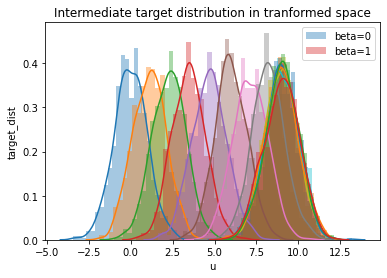

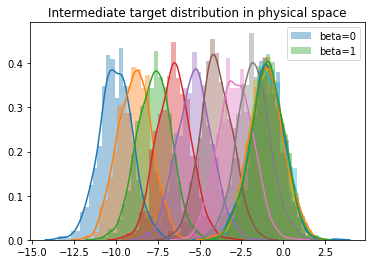

In [12]:
## Self version
# Parameter definition
# Target distribution
#  Parameter definition
# This is an example where prior p(mu) ~ N(0,1),
mu_theta_prior, sigma_theta_prior = -10, 1
prior = lambda theta: sp.stats.norm.pdf(theta,loc = mu_theta_prior, scale = sigma_theta_prior)
log_prior = lambda theta: sp.stats.norm.logpdf(theta,loc=mu_theta_prior,scale = sigma_theta_prior)
theta_prior = ERADist("Normal","MOM",[mu_theta_prior, sigma_theta_prior])
# Likelihood functions p(D|mu) ~ normal
data = np.random.randn(10)
# Likelihood function
def Likelihood(theta):
    total_likelihood = 1
    sigma_X  = 1
    for i in range(data.size):
        total_likelihood = total_likelihood*sp.stats.norm.pdf(data[i],loc = theta, scale = sigma_X)
    return total_likelihood
def log_Likelihood(theta):
    total_likelihood = 0
    sigma_X  = 1
    for i in range(data.size):
        total_likelihood = total_likelihood+sp.stats.norm.logpdf(data[i],loc = theta, scale = sigma_X)
    return total_likelihood
def target_dist_t(theta,beta_t):
    return prior(theta)*(Likelihood(theta))**beta_t
def log_target_dist_t(theta,beta_t):
    return log_prior(theta)+beta_t*log_Likelihood(theta)

# # Posterior distribution
# def target_dist(theta):
#     return prior(theta)*Likelihood(theta)

# def log_target_dist(theta):
#     return log_prior(theta)+log_Likelihood(theta)
N = 1000
dim = 1
max_it = 100
CV_target = 1.5
print('\nCE-based IS stage: ')
# transform the prior,likelihood and posterior distribution to the normal space
# Prior transformation
# Here X~ N(mu_X,sigma_X)
# U = (X-mu_X)/sigma_X; X = mu_X + sigma_X*U
x2u_prior = lambda x: (x-mu_theta_prior)/sigma_theta_prior
u2x_prior = lambda u: mu_theta_prior+sigma_theta_prior*u
# Likelihood in transformed space
L_transformed = lambda u: Likelihood(u2x_prior(u))
N_tot = 0 # Total number of samples
# Definition of parameters of random variables
mu_init = np.zeros(dim)
si_init = np.identity(dim)
beta_t = np.zeros(max_it)
samplesU = list()
# CE procedure (multinormal parametric family)
mu_U = mu_init
si_U = si_init
# Iteration
for t in range(max_it):
    # Generate samples and save them
    U = sp.stats.multivariate_normal.rvs(mean= mu_U,cov=si_U, size =N).reshape(-1,dim)
    samplesU.append(U.T)
    # Count generated samples
    N_tot += N
    # Evaluate the likelihood function
    Leval = Likelihood(u2x_prior(U)) 
    # Initalize beta, beta increases from 0 to 1
    if t == 0:
        beta_t[t] = 0
    else:
        beta_t[t] = beta_new
    # calculating h for the likelihood ratio
    h = sp.stats.multivariate_normal.pdf(U,mu_U,si_U)
    phi = sp.stats.multivariate_normal.pdf(U,mean=np.zeros(dim),cov=np.identity(dim))
    # Likelihood ratio for the original CE weight
    W = phi/h
    # improved CE Likelihood weight W_t = W*l**Beta_t
    # W_t = W.reshape(N,-1)*Leval**beta_t[t]
#     # CV of W_t
#     delta_Wt = np.std(W_t)/np.mean(W_t)
#     if delta_Wt <= CV_target:
#         break
    if beta_t[t] >= 1-1e-6:
        break
#     # Solve the optimisation problem
    Wt_fun = lambda beta: W*np.power(Leval,beta)[:,0]
    CV_Wt_fun = lambda beta: np.std(Wt_fun(beta))/np.mean(Wt_fun(beta))
#    fmin = lambda beta: abs(CV_Wt_fun(beta)-CV_target)
    ESS_target = N/(1+CV_target**2)
    ESS_observed = lambda beta: N/(1+(CV_Wt_fun(beta))**2)
    fmin = lambda beta: abs(ESS_target-ESS_observed(beta))
    beta_new = sp.optimize.fminbound(fmin,beta_t[t],1)
    # Update W_t
    W_t = Wt_fun(beta_new)
    # Parameter update: closed form
    mu_U = W_t@U/sum(W_t)
    Xtmp = U-mu_U
    Xo = Xtmp *np.tile(np.sqrt(W_t),(dim,1)).T
    Si_U = np.matmul(Xo.T,Xo)/np.sum(W_t)+1e-6*np.identity(dim)
#total levels
lv = t
# Calculation of the integral of the posterior = 1
Integral = sum(W_t)/N
# Calculation of the integral of the target_dist
#Integral_target = 
# Transform the samples to the physical/ original space
samplesX = list()
for i in range(lv):
    samplesX.append(u2x_prior(samplesU[i]))
# Plot samples 
if dim == 1:
    nnp = 200
    xx = np.linspace(-6,6,nnp)
    sns.distplot(samplesU[0],label='beta=0')
    for sample in samplesU[1:-1]:
        sns.distplot(sample)
        #plt.plot(*sample,".",markersize=2)
    sns.distplot(samplesU[-1],label='beta=1')
    plt.xlabel('u')
    plt.ylabel('target_dist')
    plt.title('Intermediate target distribution in tranformed space')
    plt.legend()
    plt.show()
if dim == 1:
    nnp = 200
    xx = np.linspace(-6,6,nnp)
    sns.distplot(samplesX[0],label='beta=0')
    for sample in samplesX[1:-1]:
        sns.distplot(sample)
        #plt.plot(*sample,".",markersize=2)
    sns.distplot(samplesX[-1],label='beta=1')
    plt.title('Intermediate target distribution in physical space')
    plt.legend()
    plt.show()

In [13]:
a = list(['a','b','c','d','e'])
a

['a', 'b', 'c', 'd', 'e']

In [14]:
for i in a:
    print(i) 

a
b
c
d
e


In [15]:
for i in a[1:-1]:
    print(i)

b
c
d


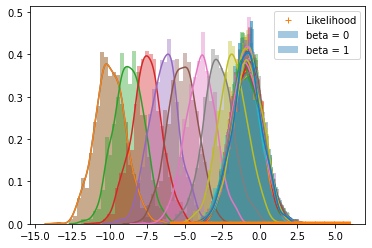

In [12]:
if dim == 1:
    nnp = 200
    xx = np.linspace(-6,6,nnp)
    sns.distplot(samplesX[0],label='beta = 0')
    for sample in samplesX:
        #sns.distplot(sample,label='Intermediate Target dist')
        sns.distplot(sample)
        #plt.plot(*sample,".",markersize=2)
    sns.distplot(samplesX[-1],label='beta = 1')
    plt.plot(xx,Likelihood(xx),'+',label='Likelihood')
    
    plt.legend()
    plt.show()

In [ ]:
#  CEBU function call
# Parameter definition


In [ ]:
if dim == 1:
    nnp = 200
    xx = np.linspace(-6,6,nnp)
    plt.hist(samplesX[0],label='/beta = 0')
    for sample in samplesX:
        #sns.distplot(sample,label='Intermediate Target dist')
        plt.hist(sample)
        #plt.plot(*sample,".",markersize=2)
    plt.hist(samplesX[-1],label='/beta = 1')
    plt.plot(xx,Likelihood(xx),'+',label='Likelihood')
    
    plt.legend()
    plt.show()

In [ ]:
if dim == 1:
    nnp = 200
    xx = np.linspace(-6,6,nnp)
    sns.distplot(samplesX[0],label='/beta = 0')
    for sample in samplesX:
        #sns.distplot(sample,label='Intermediate Target dist')
        sns.distplot(sample)
        #plt.plot(*sample,".",markersize=2)
    sns.distplot(samplesX[-1],label='/beta = 1')
    plt.plot(xx,Likelihood(xx),'+',label='Likelihood')
    
    plt.legend()
    plt.show()

In [54]:
beta_t

array([0.        , 0.01221375, 0.02858108, 0.04972899, 0.08035243,
       0.12836407, 0.20670553, 0.3451137 , 0.65164619, 0.99999456,
       0.99999664, 0.99999792, 0.99999872, 0.99999921, 0.99999951,
       0.9999997 , 0.99999981, 0.99999988, 0.99999993, 0.99999996,
       0.99999997, 0.99999998, 0.99999999, 0.99999999, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [47]:
ESS_observed(beta_new)

419.30300933791153

In [56]:
## Self version log scale
# Parameter definition
# Target distribution
#  Parameter definition
# This is an example where prior p(mu) ~ N(0,1),
mu_theta_prior, sigma_theta_prior = -10, 1
prior = lambda theta: sp.stats.norm.pdf(theta,loc = mu_theta_prior, scale = sigma_theta_prior)
log_prior = lambda theta: sp.stats.norm.logpdf(theta,loc=mu_theta_prior,scale = sigma_theta_prior)
theta_prior = ERADist("Normal","MOM",[mu_theta_prior, sigma_theta_prior])
# Likelihood functions p(D|mu) ~ normal
data = np.random.randn(10)
# Likelihood function
def Likelihood(theta):
    total_likelihood = 1
    sigma_X  = 1
    for i in range(data.size):
        total_likelihood = total_likelihood*sp.stats.norm.pdf(data[i],loc = theta, scale = sigma_X)
    return total_likelihood
def log_Likelihood(theta):
    total_likelihood = 0
    sigma_X  = 1
    for i in range(data.size):
        total_likelihood = total_likelihood+sp.stats.norm.logpdf(data[i],loc = theta, scale = sigma_X)
    return total_likelihood
def target_dist_t(theta,beta_t):
    return prior(theta)*(Likelihood(theta))**beta_t
def log_target_dist_t(theta,beta_t):
    return log_prior(theta)+beta_t*log_Likelihood(theta)

# # Posterior distribution
# def target_dist(theta):
#     return prior(theta)*Likelihood(theta)

# def log_target_dist(theta):
#     return log_prior(theta)+log_Likelihood(theta)
N = 1000
dim = 1
max_it = 100
CV_target = 1.5
print('\nCE-based IS stage: ')
# transform the prior,likelihood and posterior distribution to the normal space
# Prior transformation
# Here X~ N(mu_X,sigma_X)
# U = (X-mu_X)/sigma_X; X = mu_X + sigma_X*U
x2u_prior = lambda x: (x-mu_theta_prior)/sigma_theta_prior
u2x_prior = lambda u: mu_theta_prior+sigma_theta_prior*u
# Likelihood in transformed space
L_transformed = lambda u: Likelihood(u2x_prior(u))
N_tot = 0 # Total number of samples
# Definition of parameters of random variables
mu_init = np.zeros(dim)
si_init = np.identity(dim)
beta_t = np.zeros(max_it)
samplesU = list()
# CE procedure (multinormal parametric family)
mu_U = mu_init
si_U = si_init
# Iteration
for t in range(max_it):
    # Generate samples and save them
    U = sp.stats.multivariate_normal.rvs(mean= mu_U,cov=si_U, size =N).reshape(-1,dim)
    samplesU.append(U.T)
    # Count generated samples
    N_tot += N
    # Evaluate the likelihood function
    Leval = Likelihood(u2x_prior(U)) 
    # Initalize beta, beta increases from 0 to 1
    if t == 0:
        beta_t[t] = 0
    else:
        beta_t[t] = beta_new
    # calculating h for the likelihood ratio
    h = sp.stats.multivariate_normal.pdf(U,mu_U,si_U)
    phi = sp.stats.multivariate_normal.pdf(U,mean=np.zeros(dim),cov=np.identity(dim))
    # Likelihood ratio for the original CE weight
    W = phi/h
    # improved CE Likelihood weight W_t = W*l**Beta_t
    # W_t = W.reshape(N,-1)*Leval**beta_t[t]
#     # CV of W_t
#     delta_Wt = np.std(W_t)/np.mean(W_t)
#     if delta_Wt <= CV_target:
#         break
    if beta_t[t] >= 1-1e-6:
        break
#     # Solve the optimisation problem
    Wt_fun = lambda beta: W*np.power(Leval,beta)[:,0]
    CV_Wt_fun = lambda beta: np.std(Wt_fun(beta))/np.mean(Wt_fun(beta))
#    fmin = lambda beta: abs(CV_Wt_fun(beta)-CV_target)
    ESS_target = N/(1+CV_target**2)
    ESS_observed = lambda beta: N/(1+(CV_Wt_fun(beta))**2)
    fmin = lambda beta: abs(ESS_target-ESS_observed(beta))
    beta_new = sp.optimize.fminbound(fmin,beta_t[t],1)
    # Update W_t
    W_t = Wt_fun(beta_new)
    # Parameter update: closed form
    mu_U = W_t@U/sum(W_t)
    Xtmp = U-mu_U
    Xo = Xtmp *np.tile(np.sqrt(W_t),(dim,1)).T
    Si_U = np.matmul(Xo.T,Xo)/np.sum(W_t)+1e-6*np.identity(dim)
#total levels
lv = t
# Calculation of the integral of the posterior = 1
Integral = sum(W_t)/N
# Calculation of the integral of the target_dist
#Integral_target = 
# Transform the samples to the physical/ original space
samplesX = list()
for i in range(lv):
    samplesX.append(u2x_prior(samplesU[i]))
# Plot samples 
if dim == 1:
    nnp = 200
    xx = np.linspace(-6,6,nnp)
    for sample in samplesU:
        sns.distplot(sample)
        #plt.plot(*sample,".",markersize=2)
    plt.show()
if dim == 1:
    nnp = 200
    xx = np.linspace(-6,6,nnp)
    for sample in samplesX:
        sns.distplot(sample)
        #plt.plot(*sample,".",markersize=2)
    plt.show()    

49

In [41]:
mu_U.shape


(1,)

In [42]:
si_U.shape

(1, 1)

In [43]:
W_t = Wt_fun(beta_new)

In [44]:
beta_new

0.014582842363196432

In [45]:
W_t[:,0].shape

(1000,)

In [76]:
W

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [57]:
W_t.shape

(1000, 1)

In [53]:
Leval

array([[1.60455395e-055],
       [2.10886201e-054],
       [1.11182488e-091],
       [1.33650743e-086],
       [1.71471026e-032],
       [2.83104202e-101],
       [2.66751306e-072],
       [1.00399539e-076],
       [1.60647413e-032],
       [6.71779514e-082],
       [2.68437955e-076],
       [1.24087099e-043],
       [8.58328085e-036],
       [3.10185549e-036],
       [3.17175112e-048],
       [6.72347154e-040],
       [3.14467692e-077],
       [1.43598673e-052],
       [1.05440028e-026],
       [8.07636170e-038],
       [6.01546261e-036],
       [1.11641577e-068],
       [6.39220933e-035],
       [3.96785068e-077],
       [4.28496961e-105],
       [2.66284108e-075],
       [7.75219899e-053],
       [1.56742907e-042],
       [2.68292108e-079],
       [3.13354190e-052],
       [5.09226702e-029],
       [2.90664049e-089],
       [3.72258445e-103],
       [1.89560667e-059],
       [6.01078550e-060],
       [1.35179892e-088],
       [3.73205890e-070],
       [1.50400706e-055],
       [2.63

In [54]:
(W*Leval).shape

(1000, 1000)

In [55]:
(Leval*Leval).shape

(1000, 1)

In [56]:
V=W.reshape(N,-1)
V.shape

(1000, 1)

In [50]:
(V*Leval)

array([[8.27769450e-083],
       [6.62465690e-044],
       [3.59214426e-101],
       [3.46597261e-083],
       [5.85760170e-107],
       [1.26702890e-078],
       [3.75312477e-102],
       [5.25067872e-113],
       [7.40873998e-081],
       [2.68858696e-092],
       [4.71386426e-086],
       [2.14857696e-055],
       [6.05131565e-046],
       [1.26275659e-074],
       [4.61744923e-093],
       [3.82284576e-042],
       [8.06217776e-051],
       [1.27047444e-098],
       [2.97564319e-079],
       [2.99935511e-110],
       [1.18269859e-045],
       [6.39375600e-110],
       [1.71125131e-047],
       [2.74690859e-067],
       [6.16425928e-058],
       [2.17301110e-104],
       [1.56602697e-038],
       [7.54738030e-091],
       [2.85733833e-048],
       [3.59381948e-075],
       [1.72867034e-048],
       [2.22711883e-064],
       [1.07648543e-045],
       [1.10774596e-045],
       [2.48127586e-044],
       [5.54341218e-069],
       [5.03533247e-065],
       [5.76116860e-055],
       [1.18

In [9]:
## Self version
# Parameter definition
# Target distribution
#  Parameter definition
# This is an example where prior p(mu) ~ N(0,1),
mu_theta_prior, sigma_theta_prior = -10, 1
prior = lambda theta: sp.stats.norm.pdf(theta,loc = mu_theta_prior, scale = sigma_theta_prior)
log_prior = lambda theta: sp.stats.norm.logpdf(theta,loc=mu_theta_prior,scale = sigma_theta_prior)
theta_prior = ERADist("Normal","MOM",[mu_theta_prior, sigma_theta_prior])
# Likelihood functions p(D|mu) ~ normal
data = np.random.randn(10)
# Likelihood function
def Likelihood(theta):
    total_likelihood = 1
    sigma_X  = 1
    for i in range(data.size):
        total_likelihood = total_likelihood*sp.stats.norm.pdf(data[i],loc = theta, scale = sigma_X)
    return total_likelihood
def log_Likelihood(theta):
    total_likelihood = 0
    sigma_X  = 1
    for i in range(data.size):
        total_likelihood = total_likelihood+sp.stats.norm.logpdf(data[i],loc = theta, scale = sigma_X)
    return total_likelihood
def target_dist_t(theta,beta_t):
    return prior(theta)*(Likelihood(theta))**beta_t
def log_target_dist_t(theta,beta_t):
    return log_prior(theta)+beta_t*log_Likelihood(theta)

# # Posterior distribution
# def target_dist(theta):
#     return prior(theta)*Likelihood(theta)

# def log_target_dist(theta):
#     return log_prior(theta)+log_Likelihood(theta)
N = 1000
dim = 1
max_it = 50
CV_target = 1.5
print('\nCE-based IS stage: ')
# transform the prior,likelihood and posterior distribution to the normal space
# Prior transformation
# Here X~ N(mu_X,sigma_X)
# U = (X-mu_X)/sigma_X; X = mu_X + sigma_X*U
x2u_prior = lambda x: (x-mu_theta_prior)/sigma_theta_prior
u2x_prior = lambda u: mu_theta_prior+sigma_theta_prior*u
# Likelihood in transformed space
L_transformed = lambda u: Likelihood(u2x_prior(u))
N_tot = 0 # Total number of samples
# Definition of parameters of random variables
mu_init = np.zeros(dim)
si_init = np.identity(dim)
beta_t = np.zeros(max_it)
samplesU = list()
# CE procedure (multinormal parametric family)
mu_U = mu_init
si_U = si_init
# Iteration
for t in range(max_it):
    # Generate samples and save them
    U = sp.stats.multivariate_normal.rvs(mean= mu_U,cov=si_U, size =N).reshape(-1,dim)
    samplesU.append(U.T)
    # Count generated samples
    N_tot += N
    # Evaluate the likelihood function
    Leval = Likelihood(u2x_prior(U)) 
    # Initalize beta, beta increases from 0 to 1
    if t == 0:
        beta_t[t] = 0
    else:
        beta_t[t] = beta_new
    # calculating h for the likelihood ratio
    h = sp.stats.multivariate_normal.pdf(U,mu_U,si_U)
    phi = sp.stats.multivariate_normal.pdf(U,mean=np.zeros(dim),cov=np.identity(dim))
    # Likelihood ratio for the original CE weight
    W = phi/h
    # improved CE Likelihood weight W_t = W*l**Beta_t
    W_t = W.reshape(N,-1)*Leval**beta_t[t]
#     # CV of W_t
#     delta_Wt = np.std(W_t)/np.mean(W_t)
#     if delta_Wt <= CV_target:
#         break
#     # Solve the optimisation problem
#     Wt_fun = lambda beta: W*Leval**beta
#     CV_Wt_fun = lambda beta:np.std(Wt_fun(beta))/np.mean(Wt_fun(beta))
#     fmax = lambda beta: abs(CV_Wt_fun(beta)-CV_target)
#     beta_new = sp.optimize.fmaxbound(fmax,beta_t[t],1)
    # Update W_t
    W_t = Wt_fun(beta_new)
    # Parameter update: closed form
    mu_U = W_t@U/sum(W_t)
    Xtmp = U-mu_U
    Xo = Xtmp *np.tile(np.sqrt(W_t),(dim,1)).T
    Si_U = np.matmul(Xo.T,Xo)/np.sum(W_t)+1e-6*np.identity(dim)
#total levels
lv = t
# Calculation of the integral of the posterior = 1
Integral = sum(W_t)/N
# Calculation of the integral of the target_dist
#Integral_target = 
# Transform the samples to the physical/ original space
samplesX = list()
for i in range(lv):
    samplesX.append(u2x_prior(samplesU[i]))
# Plot samples 
if dim == 1:
    nnp = 200
    xx = np.linspace(-6,6,nnp)
    for sample in samplesU:
        plt.plot(*sample,".",markersize=2)
    plt.show()


CE-based IS stage: 


NameError: name 'Wt_fun' is not defined

In [ ]:
# MCMC based method
N_MCMC = 1000
# Sample generation
theta_current = mu_theta_prior
sp = mu_theta_prior
sigma = 2.4
x = np.zeros((N_MCMC,1))
x[0] = sp
# generate z ~ N(0,sigma) proposal density
z = np.random.uniform(0,1,N_MCMC)
for i in range(N_MCMC-1):
    # Generate Candidate sample
    y = x[i]+z[i]
    # evaluate the acceptance probability
    f_y = target_dist(y[i])
    f_x = target_dist(x[i])
    alpha = min(1,f_y/f_x)
    # check if sample should be accepted
    if u[i] <= alpha:
        x[i+1] = y
    else:
        x[i+1] = x[i]
    

In [ ]:
#

In [1]:
%matplotlib inline
import numpy as np
import scipy.stats as sps
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import norm
sns.set_style('white')
sns.set_context('talk')
np.random.seed(123)

In [2]:
# This is an example where prior p(mu) ~ N(0,1),
mu_mu = 0
sigma_mu = 1
prior = lambda mu: sps.norm.pdf(mu,loc = mu_mu, scale = sigma_mu)
log_prior = lambda mu: sps.norm.logpdf(mu,loc=mu_mu,scale=sigma_mu)
# Likelihood functions p(D|mu) ~ normal
data = np.random.randn(20)
data

array([-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471, -0.57860025,
        1.65143654, -2.42667924, -0.42891263,  1.26593626, -0.8667404 ,
       -0.67888615, -0.09470897,  1.49138963, -0.638902  , -0.44398196,
       -0.43435128,  2.20593008,  2.18678609,  1.0040539 ,  0.3861864 ])

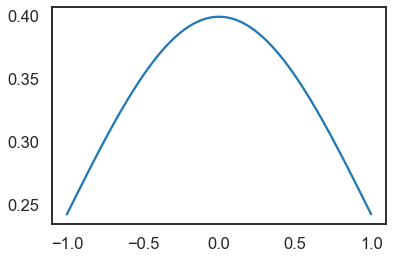

In [3]:
mu_sample = np.arange(-1,1,0.0005)
plt.plot(mu_sample,prior(mu_sample))


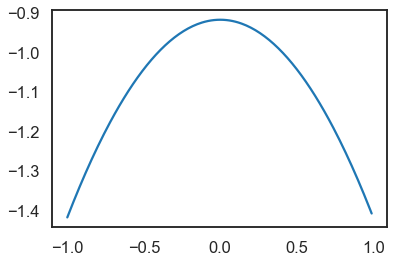

In [4]:
mu_sample = np.arange(-1,1,0.01)
plt.plot(mu_sample,log_prior(mu_sample))

In [5]:
np.mean(data)

0.11441773195529023

In [6]:
np.var(data)

1.5021278845126171

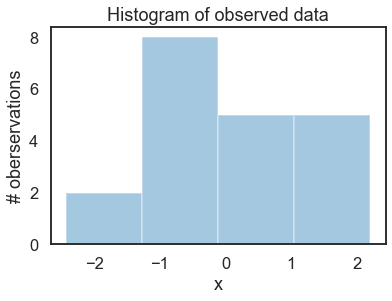

In [7]:
ax = plt.subplot()
sns.distplot(data,kde=False,ax=ax)
_ = ax.set(title='Histogram of observed data',xlabel='x',ylabel='# oberservations')


In [8]:
def likelihood(mu):
    total_likelihood = 1
    for i in range(data.size):
        total_likelihood = total_likelihood*sps.norm.pdf(data[i],loc=mu,scale=1)
    return total_likelihood
def log_likelihood(mu):
    total_log_likelihood = 0
    for i in range(data.size):
        total_log_likelihood = total_log_likelihood+sps.norm.logpdf(data[i],loc=mu,scale=1)
    return total_log_likelihood
def target_dist(mu):
    return likelihood(mu)*prior(mu)
def log_target_dist(mu):
    return log_likelihood(mu)+log_prior(mu)

<AxesSubplot:>

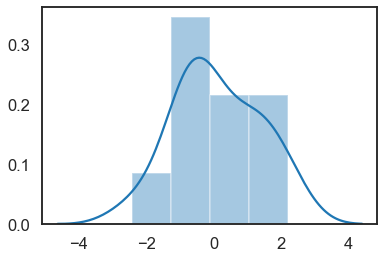

In [9]:
# Prior
sns.distplot(data)

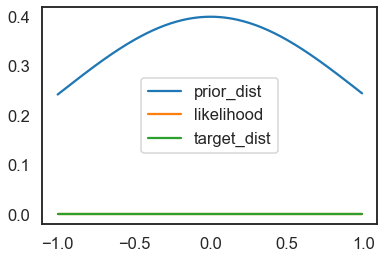

In [12]:
mu_sample = np.arange(-1,1,0.01)
plt.plot(mu_sample,prior(mu_sample),label='prior_dist')
plt.plot(mu_sample,likelihood(mu_sample),label='likelihood')
plt.plot(mu_sample,target_dist(mu_sample),label='target_dist')
plt.legend()

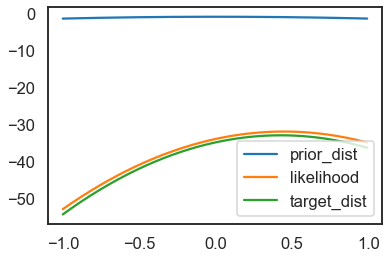

In [81]:
mu_sample = np.arange(-1,1,0.01)
plt.plot(mu_sample,log_prior(mu_sample),label='prior_dist')
plt.plot(mu_sample,log_likelihood(mu_sample),label='likelihood')
plt.plot(mu_sample,log_target_dist(mu_sample),label='target_dist')
plt.legend()

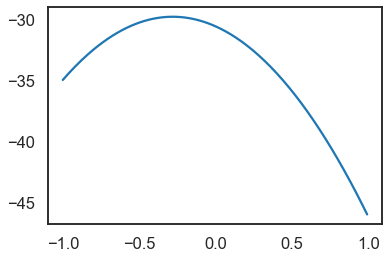

In [64]:
# Likelihood
mu_sample = np.arange(-1,1,0.01)
plt.plot(mu_sample,log_likelihood(mu_sample))

In [39]:
#ax = plt.subplot()
likelihood = lambda mu: sp.stats.norm(mu,1).pdf(data).prod()
# x = np.linspace(-1,1,500)
x = np.arange(-1,1,0.01)
likelihood(x)

ValueError: operands could not be broadcast together with shapes (20,) (200,) 

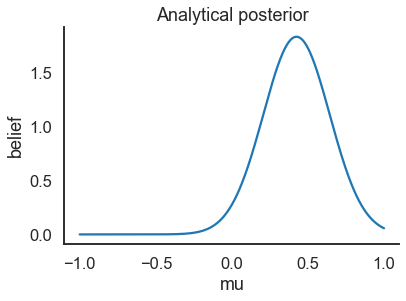

In [88]:
def calc_posterior_analytical(data,x,mu_0,sigma_0):# (sampled data,prior parameter)
    sigma = 1.# Assume we only have one parameter here mu
    # here sigma, mu are two parameters
    # mu_0  is mu_prior_mu
    # sigma_0 is the standard deviation of mu_prior_std
    n = len(data)
    mu_post = mu_0*(1/sigma_0**2/(1/sigma_0**2+n/sigma**2))+data.sum()*(1/sigma**2/(1/sigma_0**2+n/sigma**2))
    sigma_post = 1/(1/sigma_0**2+n/sigma**2)
    return norm(mu_post,np.sqrt(sigma_post)).pdf(x)
likelihood = lambda mu: sp.stats.norm(mu,1).pdf(data).prod()
ax = plt.subplot()
x = np.linspace(-1,1,500)
#L = likelihood(x)
posterior_analytical = calc_posterior_analytical(data,x,0.,1.)
ax.plot(x,posterior_analytical)  
ax.set(xlabel='mu',ylabel='belief',title='Analytical posterior')
sns.despine()                                                                    
                                                        
                                                                        
                                                                    
                                                                        
                                                                        

In [9]:
## MCMC sampling
mu_current = 1
proposal_width = 0.5
mu_proposal = sp.stats.norm(mu_current, proposal_width).rvs()
mu_proposal
#proposal =sp.stats.norm(mu_current,proposal_width).rvs()
likelihood_current = norm(mu_current,1).pdf(data).prod()
likelihood_proposal = norm(mu_proposal,1).pdf(data).prod()
# prior probability of the current and proposed mu
mu_prior_mu=0
mu_prior_sd = 1.
prior_current = norm(mu_prior_mu,mu_prior_sd).pdf(mu_current)
prior_proposal = norm(mu_prior_mu,mu_prior_sd).pdf(mu_proposal)
p_current = likelihood_current * prior_current 
p_proposal = likelihood_proposal * prior_proposal
# Accept proposal?
p_accept = p_proposal/p_current
accept = np.random.rand()<p_accept
p_proposal/p_current

0.00024215446746848768

In [10]:
likelihood_current = norm(mu_current,1).pdf(data)
likelihood_current

array([0.04532638, 0.39894087, 0.30851079, 0.01725428, 0.11475821,
       0.32267059, 0.00112496, 0.14372778, 0.38508177, 0.06985746,
       0.09746442, 0.21912074, 0.35357119, 0.10414841, 0.14065004,
       0.14261304, 0.19280572, 0.19727252, 0.398939  , 0.33044267])

In [11]:
likelihood_current = norm(mu_current,1).pdf(data).prod()
likelihood_current

1.2262032783415876e-18

In [12]:
a = np.array([2,4,6])
a


array([2, 4, 6])

In [13]:
a.prod()

48

In [14]:
def sampler(data, samples=4,mu_init=5,proposal_width =0.5 ,plot=False,mu_prior_mu = 0, mu_prior_sd =1.):
    mu_current = mu_init
    posterior = [mu_current]
    for i in range(samples):
        # Suggest new position
        mu_proposal = norm(mu_current, proposal_width).rvs()
        # Compute likelihood by multiplying probabilities of each data point
        likelihood_current = norm(mu_current,1).pdf(data).prod()
        likelihood_proposal = norm(mu_proposal,1).pdf(data).prod()
        # Compute prior probability of current and proposed mu
        prior_current = norm(mu_prior_mu, mu_prior_sd).pdf(mu_current)
        prior_proposal = norm(mu_prior_mu, mu_prior_sd).pdf(mu_proposal)
        p_current = likelihood_current* prior_current
        p_proposal = likelihood_proposal*prior_proposal
        # Accept proposal?
        p_accept = p_proposal/p_current
        # Usually would include prior probability, which we neglect here for simplicity
        accept = np.random.rand()<p_accept
        if plot:
            plot_proposal(mu_current,mu_proposal,mu_prior_mu,mu_prior_sd,data,accept,posterior,i)
        if accept:
            # Update position
            mu_current = mu_proposal
        posterior.append(mu_current)
    return np.array(posterior)
# # Function to display
# def plot_proposal(mu_current, mu_proposal, mu_prior_mu, mu_prior_sd, data, accepted, trace, i):
#     from copy import copy
#     trace = copy(trace)
#     fig,(ax1,ax2，ax3,ax4)=plt.subplot.(ncols)

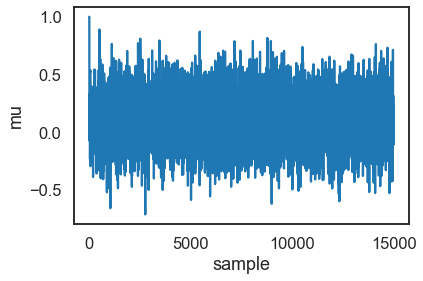

In [15]:
posterior = sampler(data, samples=15000,mu_init=1.)
fig, ax = plt.subplots()
ax.plot(posterior)
_ = ax.set(xlabel='sample',ylabel='mu')

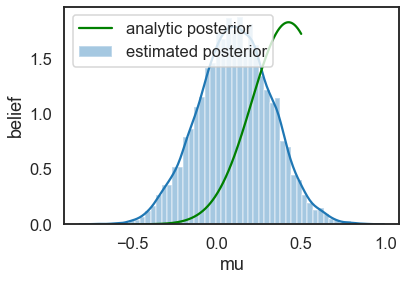

In [89]:
ax = plt.subplot()
sns.distplot(posterior[500:],ax=ax,label='estimated posterior')
x = np.linspace(-0.5,0.5,500)
post = calc_posterior_analytical(data,x,0,1)
ax.plot(x,post,'g',label='analytic posterior')
_=ax.set(xlabel='mu',ylabel='belief')
ax.legend()

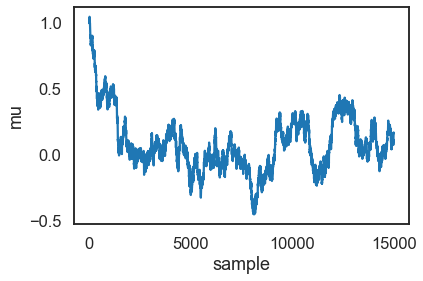

In [17]:
# above the proposal width is set to be 0.5. That turned out to be a good value.
# In general you don not want the width to be too narrow because your sampling will be inefficient as it takes a long time to explore the whole parameter space and shows the typical random walk behavior
posterior_small = sampler(data, samples=15000,mu_init=1.0,proposal_width=0.01)
fig,ax = plt.subplots()
ax.plot(posterior_small)
_ = ax.set(xlabel='sample',ylabel='mu')

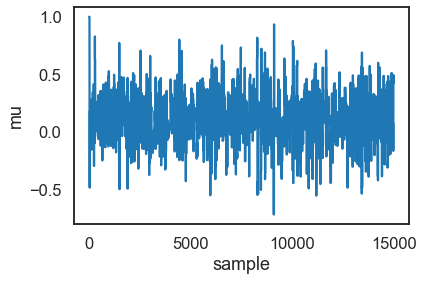

In [18]:
# But you also do not want a large width which will never accept a jump
posterior_large = sampler(data,samples=15000,mu_init=1.,proposal_width = 3.)
fig,ax = plt.subplots()
ax.plot(posterior_large)
_ = ax.set(xlabel='sample',ylabel='mu')

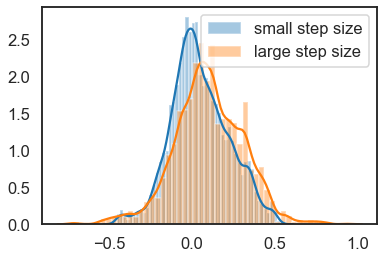

In [19]:
# Note that we are still sampling from our target posterior distribution as guaranteed by the mathematical proof, just less efficient
sns.distplot(posterior_small[1000:],label='small step size')
sns.distplot(posterior_large[1000:],label='large step size')
_ = plt.legend()

In [20]:
import pymc3 as pm
with pm.Model():
    mu = pm.Normal('mu',0,1)
    sigma = 1.
    returns = pm.Normal('returns',mu=mu,sd = sigma,obeservation=data)
    step = pm.Metropolis()
    trace = pm.sample(15000,step)
sns.distplot(trace[2000:]['mu'],label='PyMC3 sampler')
sns.distplot(posterior[500:],label='Hand-written sampler')
plt.legend()

TypeError: __init__() got an unexpected keyword argument 'obeservation'

In [1]:
import statsmodels
statsmodels.tsa.api.stattools.acf

AttributeError: module 'statsmodels' has no attribute 'tsa'

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

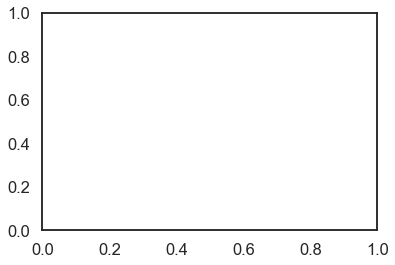

In [26]:
# with more samples this will eventually look like the true posteriro. The key is that we want our samples to be independent of each other
# One commen metric to evaluate the efficiency of our sampler is the autocorrelation
# how correlated a sample i is to sample i-1, i-1 etc
#from pymc3.stats import autocorr ? How to plot the autocorrelation
#statsmodels.tsa.api.stattools.acf
import pandas as pd
import matplotlib.pyplot as plt
lags = np.arange(1,100)
fig,ax = plt.subplots()
ax.plot(lags,[pd.Series.autocorr(posterior_large,i) for i in lags],label='large step size')
ax.plot(lags,[pd.Series.autocorr(posterior_small,i) for i in lags],label='small step size')



In [27]:
s = pd.Series([0.25,0.5,0.2,-0.05])
s.autocorr()

0.10355263309024071

In [4]:
"""Statistical utility functions for PyMC"""
 
import numpy as np
import pandas as pd
import itertools
from tqdm import tqdm
import warnings
from collections import namedtuple
from .model import modelcontext
from .util import get_default_varnames
import pymc3 as pm
from pymc3.theanof import floatX
 
from scipy.misc import logsumexp
from scipy.stats import dirichlet
from scipy.optimize import minimize
 
 
__all__ = ['autocorr', 'autocov', 'dic', 'bpic', 'waic', 'loo', 'hpd', 'quantiles',
           'mc_error', 'summary', 'df_summary', 'compare', 'bfmi', 'r2_score']
 
def statfunc(f):
    """
    Decorator for statistical utility function to automatically
    extract the trace array from whatever object is passed.
    """
 
    def wrapped_f(pymc3_obj, *args, **kwargs):
        try:
            vars = kwargs.pop('vars',  pymc3_obj.varnames)
            chains = kwargs.pop('chains', pymc3_obj.chains)
        except AttributeError:
            # If fails, assume that raw data was passed.
            return f(pymc3_obj, *args, **kwargs)
 
        burn = kwargs.pop('burn', 0)
        thin = kwargs.pop('thin', 1)
        combine = kwargs.pop('combine', False)
        # Remove outer level chain keys if only one chain)
        squeeze = kwargs.pop('squeeze', True)
 
        results = {chain: {} for chain in chains}
        for var in vars:
            samples = pymc3_obj.get_values(var, chains=chains, burn=burn,
                                           thin=thin, combine=combine,
                                           squeeze=False)
            for chain, data in zip(chains, samples):
                results[chain][var] = f(np.squeeze(data), *args, **kwargs)
 
        if squeeze and (len(chains) == 1 or combine):
            results = results[chains[0]]
        return results
 
    wrapped_f.__doc__ = f.__doc__
    wrapped_f.__name__ = f.__name__
 
    return wrapped_f
 
 
@statfunc
def autocorr(x, lag=1):
    """Sample autocorrelation at specified lag.
 
    Parameters
    ----------
    x : Numpy array
        An array containing MCMC samples
    lag : int
        The desidered lag to take in consideration
    """
    S = autocov(x, lag)
    return S[0, 1] / np.sqrt(np.prod(np.diag(S)))
 
 
@statfunc
def autocov(x, lag=1):
    """Sample autocovariance at specified lag.
 
    Parameters
    ----------
    x : Numpy array
        An array containing MCMC samples
    lag : int
        The desidered lag to take in consideration
 
    Returns
    -------
    2x2 matrix with the variances of
    x[:-lag] and x[lag:] in the diagonal and the autocovariance
    on the off-diagonal.
    """
    x = np.asarray(x)
 
    if not lag:
        return 1
    if lag < 0:
        raise ValueError("Autocovariance lag must be a positive integer")
    return np.cov(x[:-lag], x[lag:], bias=1)
 
def dic(trace, model=None):
    """Calculate the deviance information criterion of the samples in trace from model
    Read more theory here - in a paper by some of the leading authorities on model selection -
    dx.doi.org/10.1111/1467-9868.00353
 
    Parameters
    ----------
    trace : result of MCMC run
    model : PyMC Model
        Optional model. Default None, taken from context.
 
    Returns
    -------
    z : float
        The deviance information criterion of the model and trace
    """
    warnings.warn("dic has been deprecated. Use `waic` or `loo` instead.", DeprecationWarning,
                  stacklevel=2)
 
    model = modelcontext(model)
    logp = model.logp
 
    mean_deviance = -2 * np.mean([logp(pt) for pt in trace])
 
    free_rv_means = {rv.name: trace[rv.name].mean(
        axis=0) for rv in model.free_RVs}
    deviance_at_mean = -2 * logp(free_rv_means)
 
    return 2 * mean_deviance - deviance_at_mean
 
def _log_post_trace(trace, model=None, progressbar=False):
    """Calculate the elementwise log-posterior for the sampled trace.
 
    Parameters
    ----------
    trace : result of MCMC run
    model : PyMC Model
        Optional model. Default None, taken from context.
    progressbar: bool
        Whether or not to display a progress bar in the command line. The
        bar shows the percentage of completion, the evaluation speed, and
        the estimated time to completion
 
    Returns
    -------
    logp : array of shape (n_samples, n_observations)
        The contribution of the observations to the logp of the whole model.
    """
    model = modelcontext(model)
    cached = [(var, var.logp_elemwise) for var in model.observed_RVs]
 
    def logp_vals_point(pt):
        if len(model.observed_RVs) == 0:
            return floatX(np.array([], dtype='d'))
 
        logp_vals = []
        for var, logp in cached:
            logp = logp(pt)
            if var.missing_values:
                logp = logp[~var.observations.mask]
            logp_vals.append(logp.ravel())
 
        return np.concatenate(logp_vals)
 
    try:
        points = trace.points()
    except AttributeError:
        points = trace
 
    points = tqdm(points) if progressbar else points
 
    try:
        logp = (logp_vals_point(pt) for pt in points)
        return np.stack(logp)
    finally:
        if progressbar:
            points.close()
 
 
def waic(trace, model=None, pointwise=False, progressbar=False):
    """Calculate the widely available information criterion, its standard error
    and the effective number of parameters of the samples in trace from model.
    Read more theory here - in a paper by some of the leading authorities on
    model selection - dx.doi.org/10.1111/1467-9868.00353
 
    Parameters
    ----------
    trace : result of MCMC run
    model : PyMC Model
        Optional model. Default None, taken from context.
    pointwise: bool
        if True the pointwise predictive accuracy will be returned.
        Default False
    progressbar: bool
        Whether or not to display a progress bar in the command line. The
        bar shows the percentage of completion, the evaluation speed, and
        the estimated time to completion
 
    Returns
    -------
    namedtuple with the following elements:
    waic: widely available information criterion
    waic_se: standard error of waic
    p_waic: effective number parameters
    waic_i: and array of the pointwise predictive accuracy, only if pointwise True
    """
    model = modelcontext(model)
 
    log_py = _log_post_trace(trace, model, progressbar=progressbar)
    if log_py.size == 0:
        raise ValueError('The model does not contain observed values.')
 
    lppd_i = logsumexp(log_py, axis=0, b=1.0 / log_py.shape[0])
 
    vars_lpd = np.var(log_py, axis=0)
    if np.any(vars_lpd > 0.4):
        warnings.warn("""For one or more samples the posterior variance of the
        log predictive densities exceeds 0.4. This could be indication of
        WAIC starting to fail see http://arxiv.org/abs/1507.04544 for details
        """)
    waic_i = - 2 * (lppd_i - vars_lpd)
 
    waic_se = np.sqrt(len(waic_i) * np.var(waic_i))
 
    waic = np.sum(waic_i)
 
    p_waic = np.sum(vars_lpd)
 
    if pointwise:
        WAIC_r = namedtuple('WAIC_r', 'WAIC, WAIC_se, p_WAIC, WAIC_i')
        return WAIC_r(waic, waic_se, p_waic, waic_i)
    else:
        WAIC_r = namedtuple('WAIC_r', 'WAIC, WAIC_se, p_WAIC')
        return WAIC_r(waic, waic_se, p_waic)
 
 
def loo(trace, model=None, pointwise=False, reff=None, progressbar=False):
    """Calculates leave-one-out (LOO) cross-validation for out of sample
    predictive model fit, following Vehtari et al. (2015). Cross-validation is
    computed using Pareto-smoothed importance sampling (PSIS).
 
    Parameters
    ----------
    trace : result of MCMC run
    model : PyMC Model
        Optional model. Default None, taken from context.
    pointwise: bool
        if True the pointwise predictive accuracy will be returned.
        Default False
    reff : float
        relative MCMC efficiency, `effective_n / n` i.e. number of effective
        samples divided by the number of actual samples. Computed from trace by
        default.
    progressbar: bool
        Whether or not to display a progress bar in the command line. The
        bar shows the percentage of completion, the evaluation speed, and
        the estimated time to completion
 
    Returns
    -------
    namedtuple with the following elements:
    loo: approximated Leave-one-out cross-validation
    loo_se: standard error of loo
    p_loo: effective number of parameters
    loo_i: array of pointwise predictive accuracy, only if pointwise True
    """
    model = modelcontext(model)
 
    if reff is None:
        if trace.nchains == 1:
            reff = 1.
        else:
            eff = pm.effective_n(trace)
            eff_ave = pm.stats.dict2pd(eff, 'eff').mean()
            samples = len(trace) * trace.nchains
            reff = eff_ave / samples
 
    log_py = _log_post_trace(trace, model, progressbar=progressbar)
    if log_py.size == 0:
        raise ValueError('The model does not contain observed values.')
 
    lw, ks = _psislw(-log_py, reff)
    lw += log_py
    if np.any(ks > 0.7):
        warnings.warn("""Estimated shape parameter of Pareto distribution is
        greater than 0.7 for one or more samples.
        You should consider using a more robust model, this is because
        importance sampling is less likely to work well if the marginal
        posterior and LOO posterior are very different. This is more likely to
        happen with a non-robust model and highly influential observations.""")
 
    loo_lppd_i = - 2 * logsumexp(lw, axis=0)
    loo_lppd = loo_lppd_i.sum()
    loo_lppd_se = (len(loo_lppd_i) * np.var(loo_lppd_i)) ** 0.5
    lppd = np.sum(logsumexp(log_py, axis=0, b=1. / log_py.shape[0]))
    p_loo = lppd + (0.5 * loo_lppd)
 
    if pointwise:
        LOO_r = namedtuple('LOO_r', 'LOO, LOO_se, p_LOO, LOO_i')
        return LOO_r(loo_lppd, loo_lppd_se, p_loo, loo_lppd_i)
    else:
        LOO_r = namedtuple('LOO_r', 'LOO, LOO_se, p_LOO')
        return LOO_r(loo_lppd, loo_lppd_se, p_loo)
 
 
def _psislw(lw, reff):
    """Pareto smoothed importance sampling (PSIS).
 
    Parameters
    ----------
    lw : array
        Array of size (n_samples, n_observations)
    reff : float
        relative MCMC efficiency, `effective_n / n`
 
    Returns
    -------
    lw_out : array
        Smoothed log weights
    kss : array
        Pareto tail indices
    """
    n, m = lw.shape
 
    lw_out = np.copy(lw, order='F')
    kss = np.empty(m)
 
    # precalculate constants
    cutoff_ind = - int(np.ceil(min(n / 0.5, 3 * (n / reff) ** 0.5))) - 1
    cutoffmin = np.log(np.finfo(float).tiny)
    k_min = 1. / 3
 
    # loop over sets of log weights
    for i, x in enumerate(lw_out.T):
        # improve numerical accuracy
        x -= np.max(x)
        # sort the array
        x_sort_ind = np.argsort(x)
        # divide log weights into body and right tail
        xcutoff = max(x[x_sort_ind[cutoff_ind]], cutoffmin)
 
        expxcutoff = np.exp(xcutoff)
        tailinds, = np.where(x > xcutoff)
        x2 = x[tailinds]
        n2 = len(x2)
        if n2 <= 4:
            # not enough tail samples for gpdfit
            k = np.inf
        else:
            # order of tail samples
            x2si = np.argsort(x2)
            # fit generalized Pareto distribution to the right tail samples
            x2 = np.exp(x2) - expxcutoff
            k, sigma = _gpdfit(x2[x2si])
 
        if k >= k_min and not np.isinf(k):
            # no smoothing if short tail or GPD fit failed
            # compute ordered statistic for the fit
            sti = np.arange(0.5, n2) / n2
            qq = _gpinv(sti, k, sigma)
            qq = np.log(qq + expxcutoff)
            # place the smoothed tail into the output array
            x[tailinds[x2si]] = qq
            # truncate smoothed values to the largest raw weight 0
            x[x > 0] = 0
        # renormalize weights
        x -= logsumexp(x)
        # store tail index k
        kss[i] = k
 
    return lw_out, kss
 
def _gpdfit(x):
    """Estimate the parameters for the Generalized Pareto Distribution (GPD)
 
    Empirical Bayes estimate for the parameters of the generalized Pareto
    distribution given the data.
 
    Parameters
    ----------
    x : array
        sorted 1D data array
 
    Returns
    -------
    k : float
        estimated shape parameter
    sigma : float
        estimated scale parameter
    """
    prior_bs = 3
    prior_k = 10
    n = len(x)
    m = 30 + int(n**0.5)
 
    bs = 1 - np.sqrt(m / (np.arange(1, m + 1, dtype=float) - 0.5))
    bs /= prior_bs * x[int(n/4 + 0.5) - 1]
    bs += 1 / x[-1]
 
    ks = np.log1p(-bs[:, None] * x).mean(axis=1)
    L = n * (np.log(-(bs / ks)) - ks - 1)
    w = 1 / np.exp(L - L[:, None]).sum(axis=1)
 
    # remove negligible weights
    dii = w >= 10 * np.finfo(float).eps
    if not np.all(dii):
        w = w[dii]
        bs = bs[dii]
    # normalise w
    w /= w.sum()
 
    # posterior mean for b
    b = np.sum(bs * w)
    # estimate for k
    k = np.log1p(- b * x).mean()
    # add prior for k
    k = (n * k + prior_k * 0.5) / (n + prior_k)
    sigma = - k / b
 
    return k, sigma
 
def _gpinv(p, k, sigma):
    """Inverse Generalized Pareto distribution function"""
    x = np.full_like(p, np.nan)
    if sigma <= 0:
        return x
    ok = (p > 0) & (p < 1)
    if np.all(ok):
        if np.abs(k) < np.finfo(float).eps:
            x = - np.log1p(-p)
        else:
            x = np.expm1(-k * np.log1p(-p)) / k
        x *= sigma
    else:
        if np.abs(k) < np.finfo(float).eps:
            x[ok] = - np.log1p(-p[ok])
        else:
            x[ok] = np.expm1(-k * np.log1p(-p[ok])) / k
        x *= sigma
        x[p == 0] = 0
        if k >= 0:
            x[p == 1] = np.inf
        else:
            x[p == 1] = - sigma / k
 
    return x
 
def bpic(trace, model=None):
    R"""Calculates Bayesian predictive information criterion n of the samples in trace from model
    Read more theory here - in a paper by some of the leading authorities on model selection -
    dx.doi.org/10.1080/01966324.2011.10737798
 
    Parameters
    ----------
    trace : result of MCMC run
    model : PyMC Model
        Optional model. Default None, taken from context.
 
    Returns
    -------
    z : float
        The Bayesian predictive information criterion of the model and trace
    """
    warnings.warn("bpic has been deprecated. Use `waic` or `loo` instead.", DeprecationWarning,
                  stacklevel=2)
 
    model = modelcontext(model)
    logp = model.logp
 
    mean_deviance = -2 * np.mean([logp(pt) for pt in trace])
 
    free_rv_means = {rv.name: trace[rv.name].mean(
        axis=0) for rv in model.free_RVs}
    deviance_at_mean = -2 * logp(free_rv_means)
 
    return 3 * mean_deviance - 2 * deviance_at_mean
 
def compare(traces, models, ic='WAIC', method='stacking', b_samples=1000,
            alpha=1, seed=None, round_to=2):
    R"""Compare models based on the widely available information criterion (WAIC)
    or leave-one-out (LOO) cross-validation.
    Read more theory here - in a paper by some of the leading authorities on
    model selection - dx.doi.org/10.1111/1467-9868.00353
 
    Parameters
    ----------
    traces : list of PyMC3 traces
    models : list of PyMC3 models
        in the same order as traces.
    ic : string
        Information Criterion (WAIC or LOO) used to compare models.
        Default WAIC.
    method : str
        Method used to estimate the weights for each model. Available options
        are:
            - 'stacking' : (default) stacking of predictive distributions.
            - 'BB-pseudo-BMA' : pseudo-Bayesian Model averaging using Akaike-type
               weighting. The weights are stabilized using the Bayesian bootstrap
            - 'pseudo-BMA': pseudo-Bayesian Model averaging using Akaike-type
               weighting, without Bootstrap stabilization (not recommended)
 
        For more information read https://arxiv.org/abs/1704.02030
    b_samples: int
        Number of samples taken by the Bayesian bootstrap estimation. Only
        useful when method = 'BB-pseudo-BMA'.
    alpha : float
        The shape parameter in the Dirichlet distribution used for the
        Bayesian bootstrap. Only useful when method = 'BB-pseudo-BMA'. When
        alpha=1 (default), the distribution is uniform on the simplex. A
        smaller alpha will keeps the final weights more away from 0 and 1.
    seed : int or np.random.RandomState instance
           If int or RandomState, use it for seeding Bayesian bootstrap. Only
           useful when method = 'BB-pseudo-BMA'. Default None the global
           np.random state is used.
    round_to : int
        Number of decimals used to round results (default 2).
 
    Returns
    -------
    A DataFrame, ordered from lowest to highest IC. The index reflects
    the order in which the models are passed to this function. The columns are:
    IC : Information Criteria (WAIC or LOO).
        Smaller IC indicates higher out-of-sample predictive fit ("better" model).
        Default WAIC.
    pIC : Estimated effective number of parameters.
    dIC : Relative difference between each IC (WAIC or LOO)
    and the lowest IC (WAIC or LOO).
        It's always 0 for the top-ranked model.
    weight: Relative weight for each model.
        This can be loosely interpreted as the probability of each model
        (among the compared model) given the data. By default the uncertainty
        in the weights estimation is considered using Bayesian bootstrap.
    SE : Standard error of the IC estimate.
        If method = BB-pseudo-BMA these values are estimated using Bayesian
        bootstrap.
    dSE : Standard error of the difference in IC between each model and
    the top-ranked model.
        It's always 0 for the top-ranked model.
    warning : A value of 1 indicates that the computation of the IC may not be
        reliable see http://arxiv.org/abs/1507.04544 for details.
    """
    if ic == 'WAIC':
        ic_func = waic
        df_comp = pd.DataFrame(index=np.arange(len(models)),
                               columns=['WAIC', 'pWAIC', 'dWAIC', 'weight',
                                        'SE', 'dSE', 'warning'])
 
    elif ic == 'LOO':
        ic_func = loo
        df_comp = pd.DataFrame(index=np.arange(len(models)),
                               columns=['LOO', 'pLOO', 'dLOO', 'weight',
                                        'SE', 'dSE', 'warning'])
 
    else:
        raise NotImplementedError(
            'The information criterion {} is not supported.'.format(ic))
 
    if len(set([len(m.observed_RVs) for m in models])) != 1:
        raise ValueError(
            'The number of observed RVs should be the same across all models')
 
    if method not in ['stacking', 'BB-pseudo-BMA', 'pseudo-BMA']:
        raise ValueError('The method {}, to compute weights,'
                         'is not supported.'.format(method))
 
    warns = np.zeros(len(models))
 
    c = 0
    def add_warns(*args):
        warns[c] = 1
 
    with warnings.catch_warnings():
        warnings.showwarning = add_warns
        warnings.filterwarnings('always')
 
        ics = []
        for c, (t, m) in enumerate(zip(traces, models)):
            ics.append((c, ic_func(t, m, pointwise=True)))
 
    ics.sort(key=lambda x: x[1][0])
 
    if method == 'stacking':
        N, K, ic_i = _ic_matrix(ics)
        exp_ic_i = np.exp(-0.5 * ic_i)
        Km = K - 1
 
        def w_fuller(w):
            return np.concatenate((w, [max(1. - np.sum(w), 0.)]))
 
        def log_score(w):
            w_full = w_fuller(w)
            score = 0.
            for i in range(N):
                score += np.log(np.dot(exp_ic_i[i], w_full))
            return -score
 
        def gradient(w):
            w_full = w_fuller(w)
            grad = np.zeros(Km)
            for k in range(Km):
                for i in range(N):
                    grad[k] += (exp_ic_i[i, k] - exp_ic_i[i, Km]) / \
                        np.dot(exp_ic_i[i], w_full)
            return -grad
 
        theta = np.full(Km, 1. / K)
        bounds = [(0., 1.) for i in range(Km)]
        constraints = [{'type': 'ineq', 'fun': lambda x: -np.sum(x) + 1.},
                       {'type': 'ineq', 'fun': lambda x: np.sum(x)}]
 
        w = minimize(fun=log_score,
                     x0=theta,
                     jac=gradient,
                     bounds=bounds,
                     constraints=constraints)
 
        weights = w_fuller(w['x'])
        ses = [res[1] for _, res in ics]
 
    elif method == 'BB-pseudo-BMA':
        N, K, ic_i = _ic_matrix(ics)
        ic_i = ic_i * N
 
        b_weighting = dirichlet.rvs(alpha=[alpha] * N, size=b_samples,
                                    random_state=seed)
        weights = np.zeros((b_samples, K))
        z_bs = np.zeros_like(weights)
        for i in range(b_samples):
            z_b = np.dot(b_weighting[i], ic_i)
            u_weights = np.exp(-0.5 * (z_b - np.min(z_b)))
            z_bs[i] = z_b
            weights[i] = u_weights / np.sum(u_weights)
 
        weights = weights.mean(0)
        ses = z_bs.std(0)
 
    elif method == 'pseudo-BMA':
        min_ic = ics[0][1][0]
        Z = np.sum([np.exp(-0.5 * (x[1][0] - min_ic)) for x in ics])
        weights = []
        ses = []
        for _, res in ics:
            weights.append(np.exp(-0.5 * (res[0] - min_ic)) / Z)
            ses.append(res[1])
 
    if np.any(weights):
        for i, (idx, res) in enumerate(ics):
            diff = res[3] - ics[0][1][3]
            d_ic = np.sum(diff)
            d_se = np.sqrt(len(diff) * np.var(diff))
            se = ses[i]
            weight = weights[i]
            df_comp.at[idx] = (round(res[0], round_to),
                               round(res[2], round_to),
                               round(d_ic, round_to),
                               round(weight, round_to),
                               round(se, round_to),
                               round(d_se, round_to),
                               warns[idx])
 
        return df_comp.sort_values(by=ic)
 
def _ic_matrix(ics):
    """Store the previously computed pointwise predictive accuracy values (ics)
    in a 2D matrix array.
    """
    N = len(ics[0][1][3])
    K = len(ics)
    ic_i = np.zeros((N, K))
 
    for i in range(K):
        ic = ics[i][1][3]
        if len(ic) != N:
            raise ValueError('The number of observations should be the same '
                             'across all models')
        else:
            ic_i[:, i] = ic
 
    return N, K, ic_i
 
def make_indices(dimensions):
    # Generates complete set of indices for given dimensions
    level = len(dimensions)
    if level == 1:
        return list(range(dimensions[0]))
    indices = [[]]
    while level:
        _indices = []
        for j in range(dimensions[level - 1]):
            _indices += [[j] + i for i in indices]
        indices = _indices
        level -= 1
    try:
        return [tuple(i) for i in indices]
    except TypeError:
        return indices
 
 
def calc_min_interval(x, alpha):
    """Internal method to determine the minimum interval of
    a given width
 
    Assumes that x is sorted numpy array.
    """
    n = len(x)
    cred_mass = 1.0 - alpha
 
    interval_idx_inc = int(np.floor(cred_mass * n))
    n_intervals = n - interval_idx_inc
    interval_width = x[interval_idx_inc:] - x[:n_intervals]
 
    if len(interval_width) == 0:
        raise ValueError('Too few elements for interval calculation')
 
    min_idx = np.argmin(interval_width)
    hdi_min = x[min_idx]
    hdi_max = x[min_idx + interval_idx_inc]
    return hdi_min, hdi_max
 
 
@statfunc
def hpd(x, alpha=0.05, transform=lambda x: x):
    """Calculate highest posterior density (HPD) of array for given alpha. The HPD is the
    minimum width Bayesian credible interval (BCI).
 
    :Arguments:
      x : Numpy array
          An array containing MCMC samples
      alpha : float
          Desired probability of type I error (defaults to 0.05)
      transform : callable
          Function to transform data (defaults to identity)
 
    """
    # Make a copy of trace
    x = transform(x.copy())
 
    # For multivariate node
    if x.ndim > 1:
 
        # Transpose first, then sort
        tx = np.transpose(x, list(range(x.ndim))[1:] + [0])
        dims = np.shape(tx)
 
        # Container list for intervals
        intervals = np.resize(0.0, dims[:-1] + (2,))
 
        for index in make_indices(dims[:-1]):
 
            try:
                index = tuple(index)
            except TypeError:
                pass
 
            # Sort trace
            sx = np.sort(tx[index])
 
            # Append to list
            intervals[index] = calc_min_interval(sx, alpha)
 
        # Transpose back before returning
        return np.array(intervals)
 
    else:
        # Sort univariate node
        sx = np.sort(x)
 
        return np.array(calc_min_interval(sx, alpha))
 
def _hpd_df(x, alpha):
    cnames = ['hpd_{0:g}'.format(100 * alpha / 2),
              'hpd_{0:g}'.format(100 * (1 - alpha / 2))]
    return pd.DataFrame(hpd(x, alpha), columns=cnames)
 
 
@statfunc
def mc_error(x, batches=5):
    R"""Calculates the simulation standard error, accounting for non-independent
        samples. The trace is divided into batches, and the standard deviation of
        the batch means is calculated.
 
    Parameters
    ----------
    x : Numpy array
              An array containing MCMC samples
    batches : integer
              Number of batches
 
    Returns
    -------
    `float` representing the error
    """
    if x.ndim > 1:
 
        dims = np.shape(x)
        #ttrace = np.transpose(np.reshape(trace, (dims[0], sum(dims[1:]))))
        trace = np.transpose([t.ravel() for t in x])
 
        return np.reshape([mc_error(t, batches) for t in trace], dims[1:])
 
    else:
        if batches == 1:
            return np.std(x) / np.sqrt(len(x))
 
        try:
            batched_traces = np.resize(x, (batches, int(len(x) / batches)))
        except ValueError:
            # If batches do not divide evenly, trim excess samples
            resid = len(x) % batches
            new_shape = (batches, (len(x) - resid) / batches)
            batched_traces = np.resize(x[:-resid], new_shape)
 
        means = np.mean(batched_traces, 1)
 
        return np.std(means) / np.sqrt(batches)
 
 
@statfunc
def quantiles(x, qlist=(2.5, 25, 50, 75, 97.5), transform=lambda x: x):
    R"""Returns a dictionary of requested quantiles from array
 
    Parameters
    ----------
    x : Numpy array
        An array containing MCMC samples
    qlist : tuple or list
        A list of desired quantiles (defaults to (2.5, 25, 50, 75, 97.5))
    transform : callable
        Function to transform data (defaults to identity)
 
    Returns
    -------
    `dictionary` with the quantiles {quantile: value}
    """
    # Make a copy of trace
    x = transform(x.copy())
 
    # For multivariate node
    if x.ndim > 1:
        # Transpose first, then sort, then transpose back
        sx = np.sort(x.T).T
    else:
        # Sort univariate node
        sx = np.sort(x)
 
    try:
        # Generate specified quantiles
        quants = [sx[int(len(sx) * q / 100.0)] for q in qlist]
 
        return dict(zip(qlist, quants))
 
    except IndexError:
        pm._log.warning("Too few elements for quantile calculation")
def dict2pd(statdict, labelname):
    """Small helper function to transform a diagnostics output dict into a
    pandas Series.
    """
    from .backends import tracetab as ttab
    var_dfs = []
    for key, value in statdict.items():
        var_df = pd.Series(value.flatten())
        var_df.index = ttab.create_flat_names(key, value.shape)
        var_dfs.append(var_df)
    statpd = pd.concat(var_dfs, axis=0)
    statpd = statpd.rename(labelname)
    return statpd
 
def summary(trace, varnames=None, transform=lambda x: x, stat_funcs=None,
               extend=False, include_transformed=False,
               alpha=0.05, start=0, batches=None):
    R"""Create a data frame with summary statistics.
 
    Parameters
    ----------
    trace : MultiTrace instance
    varnames : list
        Names of variables to include in summary
    transform : callable
        Function to transform data (defaults to identity)
    stat_funcs : None or list
        A list of functions used to calculate statistics. By default,
        the mean, standard deviation, simulation standard error, and
        highest posterior density intervals are included.
 
        The functions will be given one argument, the samples for a
        variable as a 2 dimensional array, where the first axis
        corresponds to sampling iterations and the second axis
        represents the flattened variable (e.g., x__0, x__1,...). Each
        function should return either
 
        1) A `pandas.Series` instance containing the result of
           calculating the statistic along the first axis. The name
           attribute will be taken as the name of the statistic.
        2) A `pandas.DataFrame` where each column contains the
           result of calculating the statistic along the first axis.
           The column names will be taken as the names of the
           statistics.
    extend : boolean
        If True, use the statistics returned by `stat_funcs` in
        addition to, rather than in place of, the default statistics.
        This is only meaningful when `stat_funcs` is not None.
    include_transformed : bool
        Flag for reporting automatically transformed variables in addition
        to original variables (defaults to False).
    alpha : float
        The alpha level for generating posterior intervals. Defaults
        to 0.05. This is only meaningful when `stat_funcs` is None.
    start : int
        The starting index from which to summarize (each) chain. Defaults
        to zero.
    batches : None or int
        Batch size for calculating standard deviation for non-independent
        samples. Defaults to the smaller of 100 or the number of samples.
        This is only meaningful when `stat_funcs` is None.
 
    See also
    --------
    summary : Generate a pretty-printed summary of a trace.
 
    Returns
    -------
    `pandas.DataFrame` with summary statistics for each variable Defaults one
    are: `mean`, `sd`, `mc_error`, `hpd_2.5`, `hpd_97.5`, `n_eff` and `Rhat`.
    Last two are only computed for traces with 2 or more chains.
 
    Examples
    --------
    .. code:: ipython
 
        >>> import pymc3 as pm
        >>> trace.mu.shape
        (1000, 2)
        >>> pm.summary(trace, ['mu'])
                   mean        sd  mc_error     hpd_5    hpd_95
        mu__0  0.106897  0.066473  0.001818 -0.020612  0.231626
        mu__1 -0.046597  0.067513  0.002048 -0.174753  0.081924
 
                  n_eff      Rhat
        mu__0     487.0   1.00001
        mu__1     379.0   1.00203
 
    Other statistics can be calculated by passing a list of functions.
 
    .. code:: ipython
 
        >>> import pandas as pd
        >>> def trace_sd(x):
        ...     return pd.Series(np.std(x, 0), name='sd')
        ...
        >>> def trace_quantiles(x):
        ...     return pd.DataFrame(pm.quantiles(x, [5, 50, 95]))
        ...
        >>> pm.summary(trace, ['mu'], stat_funcs=[trace_sd, trace_quantiles])
                     sd         5        50        95
        mu__0  0.066473  0.000312  0.105039  0.214242
        mu__1  0.067513 -0.159097 -0.045637  0.062912
    """
    from .backends import tracetab as ttab
 
    if varnames is None:
        varnames = get_default_varnames(trace.varnames,
                       include_transformed=include_transformed)
 
    if batches is None:
        batches = min([100, len(trace)])
 
    funcs = [lambda x: pd.Series(np.mean(x, 0), name='mean'),
             lambda x: pd.Series(np.std(x, 0), name='sd'),
             lambda x: pd.Series(mc_error(x, batches), name='mc_error'),
             lambda x: _hpd_df(x, alpha)]
 
    if stat_funcs is not None:
        if extend:
            funcs = funcs + stat_funcs
        else:
            funcs = stat_funcs
 
    var_dfs = []
    for var in varnames:
        vals = transform(trace.get_values(var, burn=start, combine=True))
        flat_vals = vals.reshape(vals.shape[0], -1)
        var_df = pd.concat([f(flat_vals) for f in funcs], axis=1)
        var_df.index = ttab.create_flat_names(var, vals.shape[1:])
        var_dfs.append(var_df)
    dforg = pd.concat(var_dfs, axis=0)
 
    if (stat_funcs is not None) and (not extend):
        return dforg
    elif trace.nchains < 2:
        return dforg
    else:
        n_eff = pm.effective_n(trace,
                               varnames=varnames,
                               include_transformed=include_transformed)
        n_eff_pd = dict2pd(n_eff, 'n_eff')
        rhat = pm.gelman_rubin(trace,
                               varnames=varnames,
                               include_transformed=include_transformed)
        rhat_pd = dict2pd(rhat, 'Rhat')
        return pd.concat([dforg, n_eff_pd, rhat_pd],
                         axis=1, join_axes=[dforg.index])
 
 
def df_summary(*args, **kwargs):
    warnings.warn("df_summary has been deprecated. In future, use summary instead.",
                  DeprecationWarning, stacklevel=2)
    return summary(*args, **kwargs)
 
def _calculate_stats(sample, batches, alpha):
    means = sample.mean(0)
    sds = sample.std(0)
    mces = mc_error(sample, batches)
    intervals = hpd(sample, alpha)
    for key, idxs in _groupby_leading_idxs(sample.shape[1:]):
        yield key
        for idx in idxs:
            mean, sd, mce = [stat[idx] for stat in (means, sds, mces)]
            interval = intervals[idx].squeeze().tolist()
            yield {'mean': mean, 'sd': sd, 'mce': mce, 'hpd': interval}
 
 
def _calculate_posterior_quantiles(sample, qlist):
    var_quantiles = quantiles(sample, qlist=qlist)
    # Replace ends of qlist with 'lo' and 'hi'
    qends = {qlist[0]: 'lo', qlist[-1]: 'hi'}
    qkeys = {q: qends[q] if q in qends else 'q{}'.format(q) for q in qlist}
    for key, idxs in _groupby_leading_idxs(sample.shape[1:]):
        yield key
        for idx in idxs:
            yield {qkeys[q]: var_quantiles[q][idx] for q in qlist}
 
 
def _groupby_leading_idxs(shape):
    """Group the indices for `shape` by the leading indices of `shape`.
 
    All dimensions except for the rightmost dimension are used to create
    groups.
 
    A 3d shape will be grouped by the indices for the two leading
    dimensions.
 
        >>> for key, idxs in _groupby_leading_idxs((3, 2, 2)):
        ...     print('key: {}'.format(key))
        ...     print(list(idxs))
        key: (0, 0)
        [(0, 0, 0), (0, 0, 1)]
        key: (0, 1)
        [(0, 1, 0), (0, 1, 1)]
        key: (1, 0)
        [(1, 0, 0), (1, 0, 1)]
        key: (1, 1)
        [(1, 1, 0), (1, 1, 1)]
        key: (2, 0)
        [(2, 0, 0), (2, 0, 1)]
        key: (2, 1)
        [(2, 1, 0), (2, 1, 1)]
 
    A 1d shape will only have one group.
 
        >>> for key, idxs in _groupby_leading_idxs((2,)):
        ...     print('key: {}'.format(key))
        ...     print(list(idxs))
        key: ()
        [(0,), (1,)]
    """
    idxs = itertools.product(*[range(s) for s in shape])
    return itertools.groupby(idxs, lambda x: x[:-1])
 
def bfmi(trace):
    R"""Calculate the estimated Bayesian fraction of missing information (BFMI).
 
    BFMI quantifies how well momentum resampling matches the marginal energy
    distribution.  For more information on BFMI, see
    https://arxiv.org/pdf/1604.00695.pdf.  The current advice is that values
    smaller than 0.2 indicate poor sampling.  However, this threshold is
    provisional and may change.  See
    http://mc-stan.org/users/documentation/case-studies/pystan_workflow.html
    for more information.
 
    Parameters
    ----------
    trace : result of an HMC/NUTS run, must contain energy information
 
    Returns
    -------
    z : float
        The Bayesian fraction of missing information of the model and trace.
    """
    energy = trace['energy']
 
    return np.square(np.diff(energy)).mean() / np.var(energy)
 
def r2_score(y_true, y_pred, round_to=2):
    R"""R-squared for Bayesian regression models. Only valid for linear models.
    http://www.stat.columbia.edu/%7Egelman/research/unpublished/bayes_R2.pdf
 
    Parameters
    ----------
    y_true: : array-like of shape = (n_samples) or (n_samples, n_outputs)
        Ground truth (correct) target values.
    y_pred : array-like of shape = (n_samples) or (n_samples, n_outputs)
        Estimated target values.
    round_to : int
        Number of decimals used to round results (default 2).
 
    Returns
    -------
    `namedtuple` with the following elements:
    R2_median: median of the Bayesian R2
    R2_mean: mean of the Bayesian R2
    R2_std: standard deviation of the Bayesian R2
    """
    dimension = None
    if y_true.ndim > 1:
        dimension = 1
 
    var_y_est = np.var(y_pred, axis=dimension)
    var_e = np.var(y_true - y_pred, axis=dimension)
 
    r2 = var_y_est / (var_y_est + var_e)
    r2_median = np.around(np.median(r2), round_to)
    r2_mean = np.around(np.mean(r2), round_to)
    r2_std = np.around(np.std(r2), round_to)
    r2_r = namedtuple('r2_r', 'r2_median, r2_mean, r2_std')
    return r2_r(r2_median, r2_mean, r2_std)
 

ModuleNotFoundError: No module named '__main__.model'; '__main__' is not a package